In [3]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 75kB/s 
     |████████████████████████████████| 3.8MB 49.0MB/s 
     |████████████████████████████████| 450kB 48.7MB/s 
     |████████████████████████████████| 81kB 11.2MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

# The "hello world" of neural networks
* Dense: define number of connected layers in the NN (1 layer in the example below)
* Units: number of neurons in the layer (1 neuron in each layer in the example below)
* input shape: 1 value in this example
* optimizer = sgd: stochastic gradient descent
* loss = mean_squared_error
* epochs: how many times you go through the neuron network training loop (make a guess, evaluate, use the result to adjust the rule of guessing, make another guess, repeat)
* verbose = 0: not print the progress of training (default: verbose = 1, will print the progress)




In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [2]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)
model.fit(xs, ys, epochs=500, verbose = 0)
print(model.predict([10.0]))

[[18.983196]]


In [3]:
print(tf.__version__)

2.0.0


# First Computer Vision Example --- Recognizing Clothes 
First step: load data from the clothe database, MNIST. (labeled images of clothe items in greystyle)

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
len(train_images)+len(test_images)

70000

Images are represented by a matrix of numbers representing greyscale, labels are numbers (or ids) to uniquely represent a clothe category. (Do we need to one-hot encoding this? Maybe not, since we want the one correct answer, that is to minimize the total loss.)

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

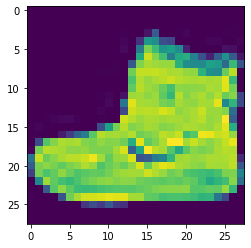

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
print(train_labels[0])
print(train_images[0])

Normalize the data to between 0 and 1.

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(10,activation=tf.nn.softmax)
])

**Sequential**: defines a SEQUENCE of layers in the neural network<br>
**Flatten**: turns matrix to 1d vector<br>
**Dense**: Adds a layer of neurons<br>
**Relu**: effectively means if X>0 return X, else return 0<br>
**Softmax**: takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


In [11]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 270us/sample - loss: 0.2661 - accuracy: 0.9003
Epoch 2/5
60000/60000 [==============================] - 15s 258us/sample - loss: 0.2502 - accuracy: 0.9062
Epoch 3/5
60000/60000 [==============================] - 15s 256us/sample - loss: 0.2406 - accuracy: 0.9097
Epoch 4/5
60000/60000 [==============================] - 15s 254us/sample - loss: 0.2278 - accuracy: 0.9145
Epoch 5/5
60000/60000 [==============================] - 15s 256us/sample - loss: 0.2189 - accuracy: 0.9176


In [12]:
model.evaluate(test_images, test_labels)

10000/1 [====================] - 1s 100us/sample - loss: 0.2160 - accuracy: 0.8752


[0.3671875635504723, 0.8752]

In [13]:
classifications = model.predict(test_images)
print(classifications[0])

[1.15347289e-11 1.77402689e-12 3.25114081e-14 1.05242116e-14
 2.49218701e-12 4.64756567e-07 1.28941210e-13 2.21466227e-03
 6.54562776e-13 9.97784913e-01]


The above should be the predicted probability that the image belongs to each class.

In [14]:
print(test_labels[0])

9


Experiment different parameters

In [10]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(train_images, train_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 277us/sample - loss: 0.4730
Epoch 2/5
60000/60000 [==============================] - 16s 258us/sample - loss: 0.3583
Epoch 3/5
60000/60000 [==============================] - 16s 261us/sample - loss: 0.3195
Epoch 4/5
60000/60000 [==============================] - 16s 258us/sample - loss: 0.2957
Epoch 5/5
10000/1 [================================] - 1s 105us/sample - loss: 0.2778
[6.7313861e-09 2.2362809e-09 2.6312863e-09 2.0680650e-08 2.2992255e-08
 2.0600557e-03 4.1221760e-08 9.4038695e-03 6.1092521e-08 9.8853594e-01]
9


95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])


Train on 60000 samples
Epoch 1/5
59712/60000 [============================>.] - ETA: 0s - loss: 0.4755 - accuracy: 0.8310
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 10s 169us/sample - loss: 0.4750 - accuracy: 0.8312
